**1. Importing libraries**

In [90]:
import numpy as np 
import pandas as pd 
from sklearn import datasets, metrics, cluster
import matplotlib.pyplot as plt

**a.** ***Numpy*** is a python library used for working with *arrays*, *mathematical functions*, *random number generators*, *linear algebra routines*, *fourier transforms* and more

**b.** ***Pandas*** python library is used for *data manipulation* and *analysis*

**c.** ***sklearn*** is simple and efficient library for *predictive data analysis* in python

**d.** ***Matpolotlib*** is a comprehensive library for *creating static*, *animated and interactive visualization* in python.

**2. Reading the data**

In [91]:
iris = datasets.load_iris()
data = pd.DataFrame(iris.data ,columns=iris.feature_names)

Reading iris dataset from sklearn datset and creating DataFrame.

DataFrame is 2-dimensional labeled data structure with columns of potentially different types.


**3. Diving into the data**

In [92]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Returns first n rows of DataFrame.

Default value is 5.

You can give any number into the head() function.

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


Print a concise summary of a DataFrame.

In [94]:
data.describe()    # or  data.describe(include='all') 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Returns descriptive statistics.Default value of describe()function is numeric.

**4.Visualising the data**

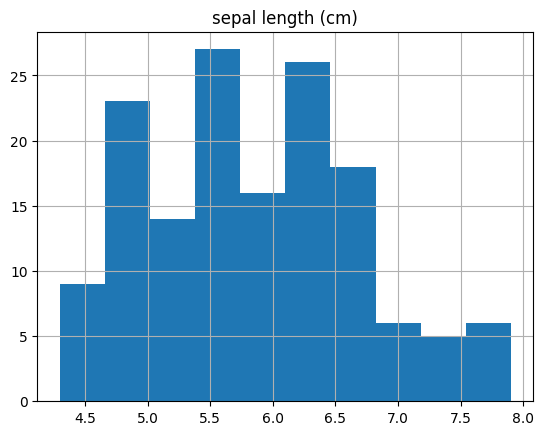

In [95]:
data.hist(column='sepal length (cm)')
plt.show()

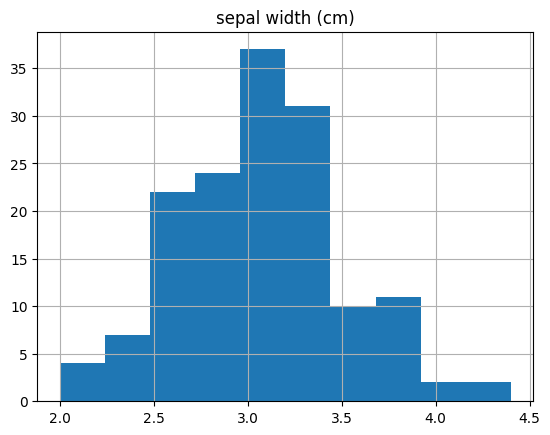

In [96]:
data.hist(column='sepal width (cm)')
plt.show()

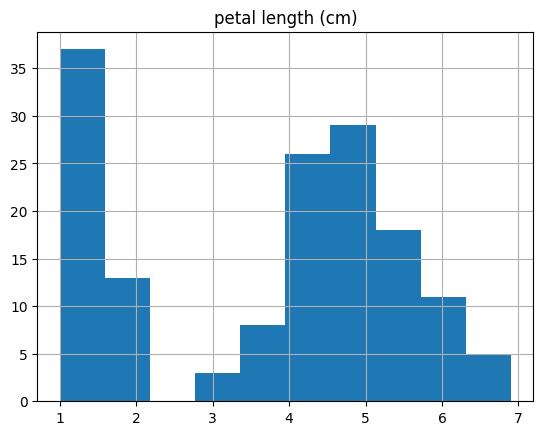

In [97]:
data.hist(column='petal length (cm)')
plt.show()

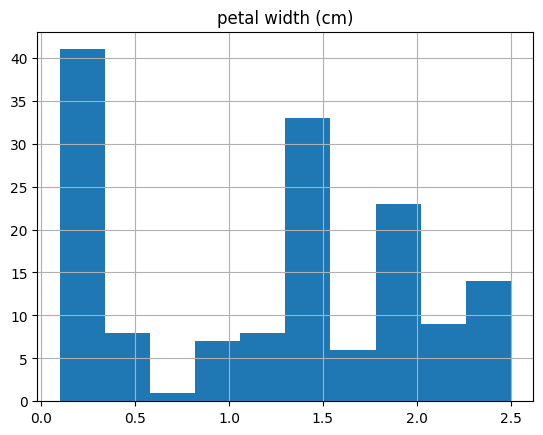

In [98]:
data.hist(column='petal width (cm)')
plt.show()

**5. Finding the optimum number of clusters**

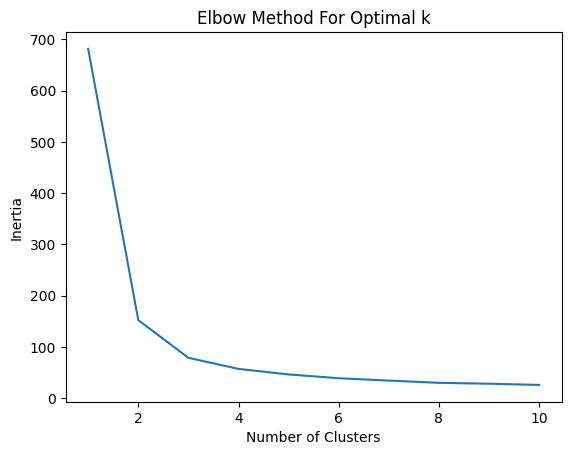

In [99]:
from sklearn.cluster import KMeans

# Initialize variables
centroid_list = []
No_of_clusters = range(1, 11)

for i in No_of_clusters:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data.values)
    centroid_list.append(kmeans.inertia_)

# Plotting the results
plt.plot(No_of_clusters, centroid_list)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


This is the 'Elbow Curve Method".It's most widely used method to identify optimum number of clusters.

The basic idea is for each k value,we calculate average distances to the centroid across all data points.

The curve looks like an elbow. When average distance to the centroid doesn't decrease significantly with every iteration, we can choose optimum number of clusters. In the above plot,the elbow is at k=3.

**6. Training and prediction**

In [100]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
centroids=kmeans.fit_predict(data.values)

Here we simply changed n_cluster value to 3. In the next line storing prediction in the centroid variable.

In [101]:
print(centroid)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


Simply printing centroid values.

**7. Plotting prediction**

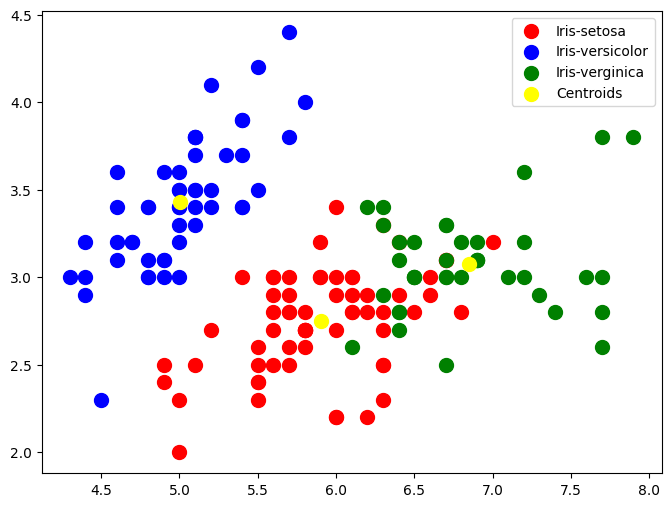

In [102]:
plt.figure(figsize=(8,6))
plt.scatter(data.values[centroid == 0,0], data.values[centroid == 0,1], s= 100, c = 'red' ,label='Iris-setosa')
plt.scatter(data.values[centroid == 1,0], data.values[centroid == 1,1], s= 100, c = 'blue' ,label='Iris-versicolor')
plt.scatter(data.values[centroid == 2,0], data.values[centroid == 2,1], s= 100, c = 'green' ,label='Iris-verginica')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 100, c ='yellow', label ='Centroids')
plt.legend()

Confusion Matrix:
[[ 0 50  0]
 [48  0  2]
 [14  0 36]]


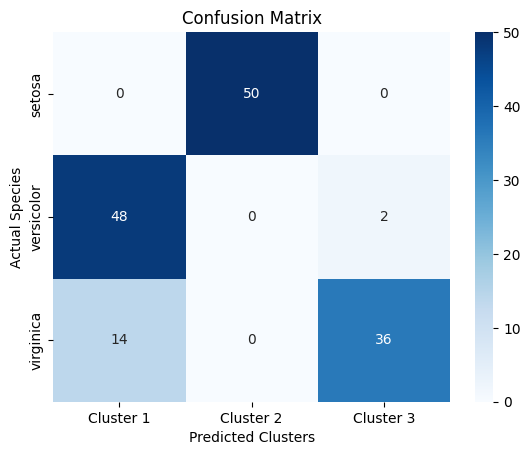

Silhouette Score: 0.55


In [103]:
# Compute confusion matrix 
# Assuming 'labels' is the ground truth labels for the Iris dataset 
labels =iris.target

# Compute confusion matrix 
conf_matrix = confusion_matrix(labels, centroids) 
print("Confusion Matrix:") 
print(conf_matrix)

(conf_matrix) 
# Visualize the confusion matrix 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Cluster 1', 'Cluster 2', 'Cluster 3'], yticklabels=iris.target_names) 
plt.xlabel('Predicted Clusters') 
plt.ylabel('Actual Species')
plt.title('Confusion Matrix') 
plt.show() 

# Compute silhouette score 
sil_score = silhouette_score(data.values, centroids) 
print(f"Silhouette Score: {sil_score:.2f}")

**Discussion and Conclusion**
Comparison of Clusters and Real Classes: By comparing the confusion matrix and the cluster visualization, we observe that the clusters formed by k-means closely match the true classes of iris species. While the clusters may partially align with the real classes, k-means does not know the true classes and does not use them in the algorithm.

Impact of Centroid Initialization: The k-means algorithm can produce different results depending on the initial positions of the centroids. This variation can be mitigated by using multiple initializations (n_init in KMeans).

Stability of the k-means Algorithm: k-means is not always stable across runs because the algorithm relies on initialization. However, using random_state helps to reproduce the same results.

Comparison with k-Nearest Neighbors (k-NN) Algorithm: k-NN is a supervised algorithm that uses class labels during training, unlike k-means, which is unsupervised and aims to group similar points.

Performance: k-NN tends to be more accurate for classification since the real labels are known, while k-means is used to explore group patterns without prior knowledge of the classes.

Conclusion: k-NN is more suitable for classification tasks when labels are available, whereas k-means is useful for exploratory analyses.